In [1]:
# import libraries
import matplotlib.pyplot as plt
from environment import environment
from QLearning import qLearning
import numpy as np
import pandas as pd
from statistics import mean

In [2]:
# grid search
grid_rewards = []
grid_length = []
gamma = []
alpha = []
epsilon = []
for g in [0.8,0.9,0.99]:
    for a in [0.05,0.1,0.2]:
        for e in [0.05,0.1,0.2]:
            # create an environment with 1 ghost with probability of 0.5
            env = environment(1,0.5,random_learning=False)
            env.reset()

            # Q-learning 
            num_episodes = 100
            Q,length,rewards = qLearning(env=env, num_episodes=num_episodes, discount_factor=g, alpha=a, epsilon=e)
            grid_rewards.append(mean(rewards))
            grid_length.append(mean(length))
            gamma.append(g)
            alpha.append(a)
            epsilon.append(e)

# show results
results = pd.DataFrame({'avg_rewards':grid_rewards,'avg_length':grid_length,'gamma':gamma,'alpha':alpha,'epsilon':epsilon})
results

,avg_rewards,avg_length,gamma,alpha,epsilon
0,89.12,47.23,0.80,0.05,0.05
1,69.64,59.21,0.80,0.05,0.10
2,82.03,62.12,0.80,0.05,0.20
3,90.88,52.72,0.80,0.10,0.05
4,80.77,57.33,0.80,0.10,0.10
5,89.02,57.28,0.80,0.10,0.20
6,54.07,54.73,0.80,0.20,0.05
7,63.02,49.83,0.80,0.20,0.10
8,77.05,60.35,0.80,0.20,0.20
9,88.97,55.18,0.90,0.05,0.05


In [3]:
# show the best result and its hyperparameters
idx = results['avg_rewards'].argmax()
results.iloc[idx]

avg_rewards    97.67
avg_length     48.53
gamma           0.90
alpha           0.10
epsilon         0.05
Name: 12, dtype: float64

In [4]:
# create an environment with 1 ghost with probability of 0.5
env = environment(1,0.5,random_learning=False)
env.reset()

# Q-learning with gamma=0.9, alpha=0.1 and epsilon=0.05
num_episodes = 100
Q,length,rewards = qLearning(env=env, num_episodes=num_episodes, discount_factor=0.9, alpha=0.1, epsilon=0.05)

In [5]:
# create pandas dataframe
df = pd.DataFrame({'rewards':rewards,'length':length})
avg_rewards = []
avg_length = []
for i in range(num_episodes):
    if i == 0:
        avg_rewards.append(df['rewards'][0])
        avg_length.append(df['length'][0])
    else:
        avg_rewards.append(df['rewards'][:i].mean().round(1))
        avg_length.append(df['length'][:i].mean().round(1))
df['avg_rewards'] = avg_rewards
df['avg_length'] = avg_length
df

,rewards,length,avg_rewards,avg_length
0,25,14,25.0,14.0
1,14,120,25.0,14.0
2,-9,88,19.5,67.0
3,20,114,10.0,74.0
4,18,6,12.5,84.0
...,...,...,...,...
95,139,120,97.0,48.3
96,122,82,97.4,49.0
97,164,40,97.6,49.3
98,111,23,98.3,49.2


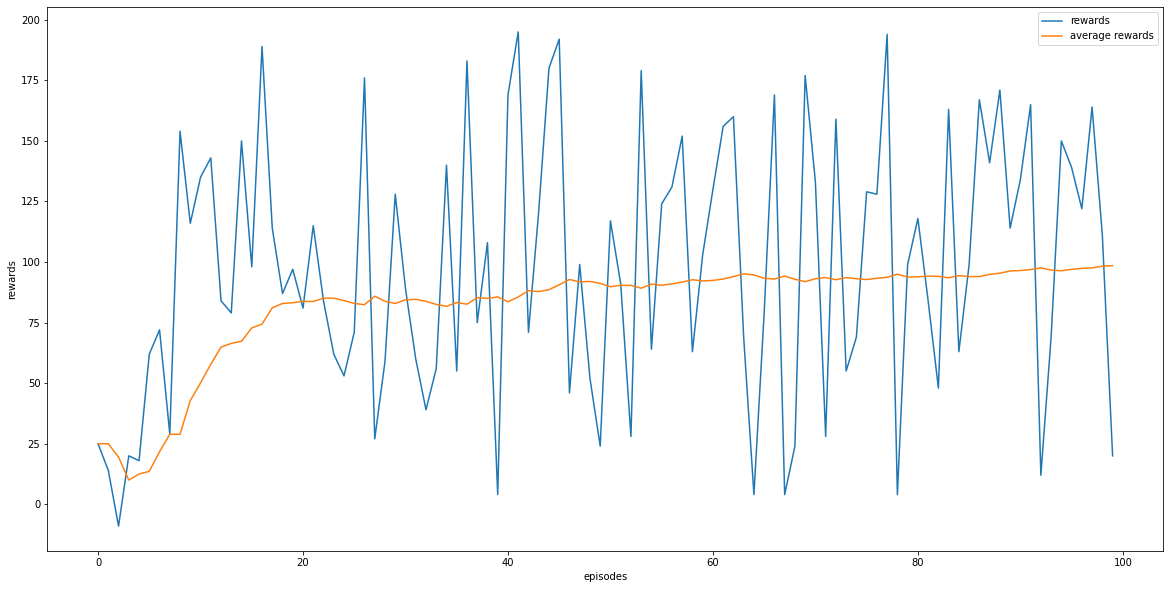

In [6]:
# visualisation
plt.figure(figsize=(20,10))
plt.plot(df['rewards'], label='rewards')
plt.plot(df['avg_rewards'], label='average rewards')
plt.xlabel('episodes')
plt.ylabel('rewards')
plt.legend()
plt.show()

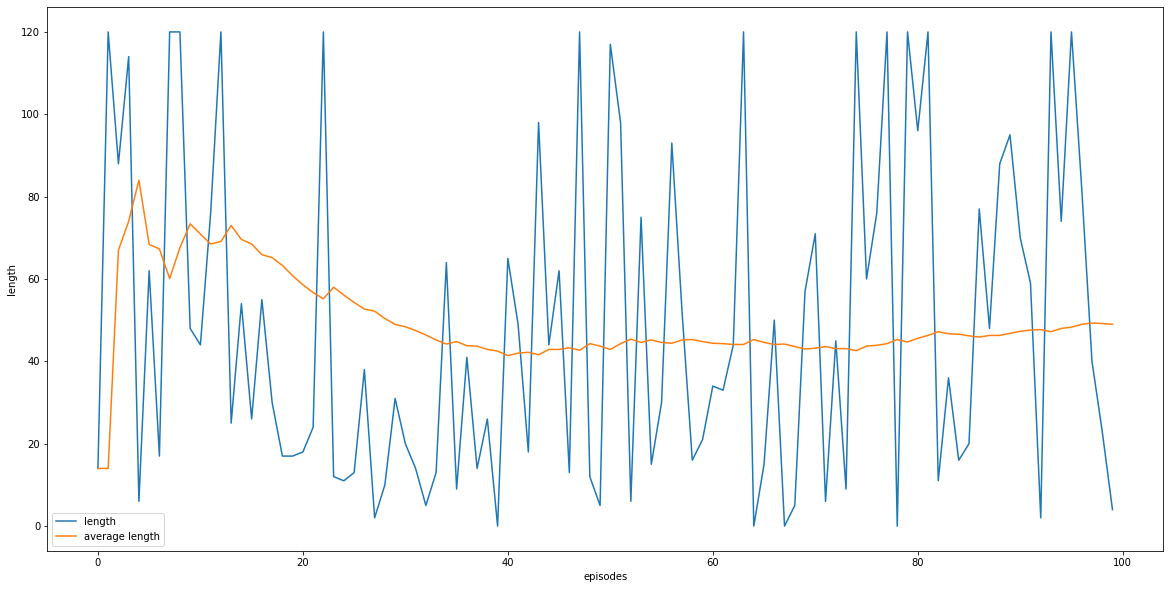

In [7]:
# visualisation
plt.figure(figsize=(20,10))
plt.plot(df['length'], label='length')
plt.plot(df['avg_length'], label='average length')
plt.xlabel('episodes')
plt.ylabel('length')
plt.legend()
plt.show()

In [8]:
# create an environment with 3 ghosts with probability of 1
env = environment(3,1,random_learning=False)
env.reset()

# Q-learning
num_episodes = 100
Q,length,rewards = qLearning(env=env, num_episodes=num_episodes, discount_factor=0.9, alpha=0.1, epsilon=0.05)

In [9]:
# create pandas dataframe
df = pd.DataFrame({'rewards':rewards,'length':length})
avg_rewards = []
avg_length = []
for i in range(num_episodes):
    if i == 0:
        avg_rewards.append(df['rewards'][0])
        avg_length.append(df['length'][0])
    else:
        avg_rewards.append(df['rewards'][:i].mean().round(1))
        avg_length.append(df['length'][:i].mean().round(1))
df['avg_rewards'] = avg_rewards
df['avg_length'] = avg_length
df

,rewards,length,avg_rewards,avg_length
0,1,8,1.0,8.0
1,27,12,1.0,8.0
2,9,15,14.0,10.0
3,13,16,12.3,11.7
4,9,10,12.5,12.8
...,...,...,...,...
95,39,10,85.3,46.8
96,169,35,84.8,46.4
97,132,47,85.6,46.3
98,74,120,86.1,46.3


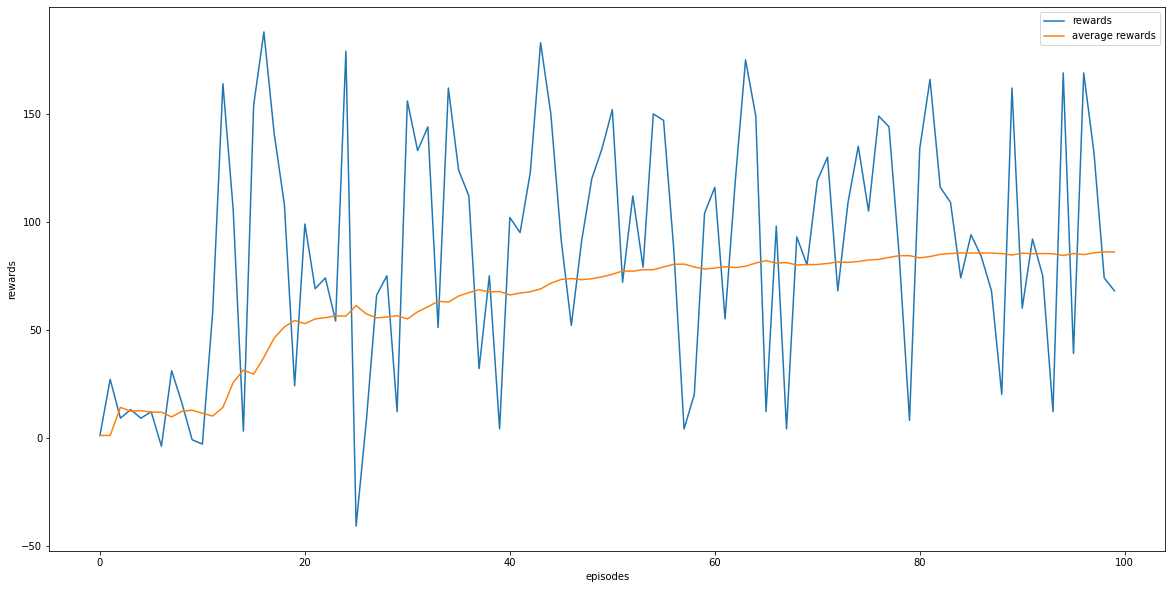

In [10]:
# visualisation
plt.figure(figsize=(20,10))
plt.plot(df['rewards'], label='rewards')
plt.plot(df['avg_rewards'], label='average rewards')
plt.xlabel('episodes')
plt.ylabel('rewards')
plt.legend()
plt.show()

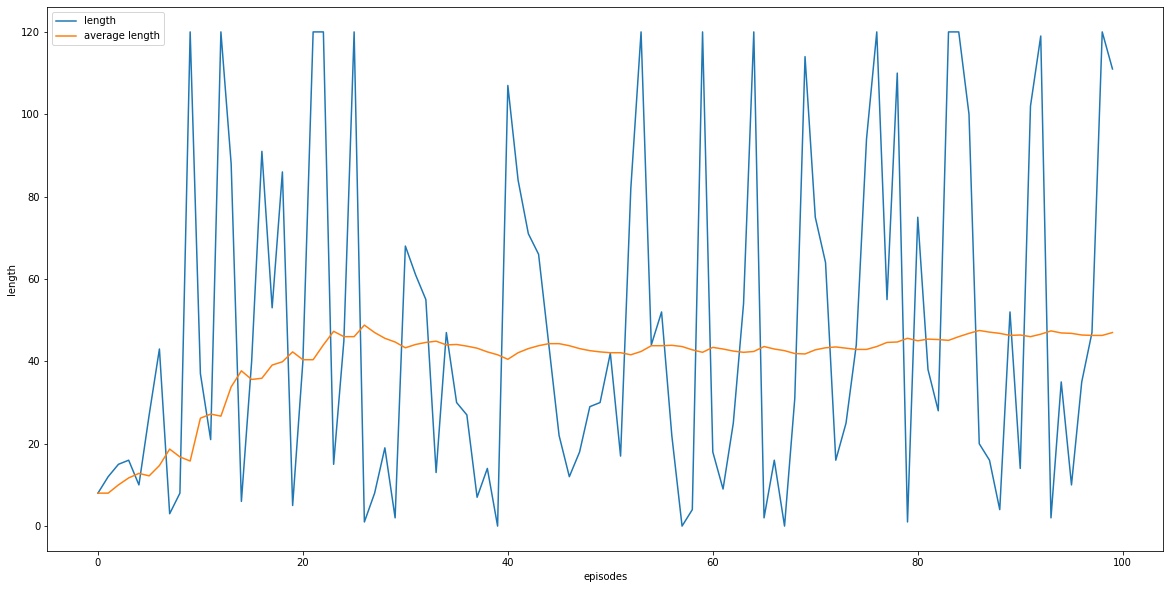

In [11]:
# visualisation
plt.figure(figsize=(20,10))
plt.plot(df['length'], label='length')
plt.plot(df['avg_length'], label='average length')
plt.xlabel('episodes')
plt.ylabel('length')
plt.legend()
plt.show()